In [1]:
import sys
sys.path.append('../..')
import matplotlib.pyplot as plt
import numpy as np
import gillespy2
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver
from gillespy2.example_models import Example

In [2]:
class StoichTestModel(gillespy2.Model):
            def __init__(self, parameter_values=None):
                gillespy2.Model.__init__(self, name='StochTest1')
                A = gillespy2.Species(name='A', initial_value=10, mode='continuous')
                B = gillespy2.Species(name='B', initial_value=0, mode='continuous')
                self.add_species([A, B])
                k = gillespy2.Parameter(name='k', expression=1)
                self.add_parameter([k])
                r = gillespy2.Reaction(name='r', reactants={A: 2}, products={B:1}, rate=k)
                print(r.propensity_function)
                print(r.ode_propensity_function)
                self.add_reaction([r])
                self.timespan(np.linspace(0, 100, 101))

In [3]:
model = StoichTestModel()

0.5*k*A*(A-1)/vol
A*A*k


In [4]:
%time results = model.run(solver=BasicTauHybridSolver)
print(results[0]['A'])
print(results[0]['B'])

{'A': '-2*(A*A*k)', 'B': '1*(A*A*k)'}
1.0
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
[-200.0, 100.0]
2.0
[-72199.99999999996, 36099.99999999998]
[-72199.99999999996, 36099.99999999998]
[-72199.99999999996, 36099.99999999998]
[-72199.99999999996, 36099.99999999998]
[-72199.99999999996, 36099.99999999998]
[-72199.99999999996, 36099.99999999998]
[-72199.99999999996, 36099.99999999998]
[-72199.99999999996, 36099.99999999998]
[-72199.99999999996, 36099.99999999998]
[-72199.99999999996, 36099.99999999998]
3.0
[-10480624199.999975, 5240312099.999988]
[-10480624199.999975, 5240312099.999988]
[-10480624199.999975, 5240312099.999988]
[-10480624199.999975, 52403

[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
96.0
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
97.0
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
98.0
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
99.0
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
100.0
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
CPU times: user 62.5 ms, sys: 78.1 ms, total: 141 ms
Wall time: 439 ms
[ 1.00000000e+001 -1.90000000e+002 -7.23900000e+004 -1.04806966e+010
 -2.19690002e+020 -9.65273940e+040 -1.86350756e+082 -6.94532084e+164
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan 

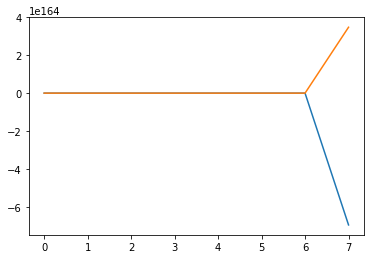

In [5]:
for spec in results[0]:
    if spec == 'time': continue
    plt.plot(results[0]['time'], results[0][spec])

In [6]:
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver

In [7]:
%time results = model.run(solver=BasicODESolver)
print(results[0]['A'])
print(results[0]['B'])

CPU times: user 46.9 ms, sys: 0 ns, total: 46.9 ms
Wall time: 4.72 ms
[1.00000000e+01 4.76190461e-01 2.43902428e-01 1.63934417e-01
 1.23456782e-01 9.90098938e-02 8.26446207e-02 7.09219791e-02
 6.21117958e-02 5.52486122e-02 4.97512375e-02 4.52488634e-02
 4.14937710e-02 3.83141705e-02 3.55871830e-02 3.32225862e-02
 3.11526432e-02 2.93255089e-02 2.77008268e-02 2.62467146e-02
 2.49376513e-02 2.37529648e-02 2.26757329e-02 2.16919702e-02
 2.07900173e-02 1.99600766e-02 1.91938549e-02 1.84842851e-02
 1.78253086e-02 1.72117007e-02 1.66389318e-02 1.61030564e-02
 1.56006210e-02 1.51285901e-02 1.46842850e-02 1.42653326e-02
 1.38696230e-02 1.34952743e-02 1.31406022e-02 1.28040950e-02
 1.24843920e-02 1.21802654e-02 1.18906035e-02 1.16143990e-02
 1.13507350e-02 1.10987765e-02 1.08577609e-02 1.06269904e-02
 1.04058253e-02 1.01936781e-02 9.99000828e-03 9.79431770e-03
 9.60614643e-03 9.42506927e-03 9.25069246e-03 9.08265087e-03
 8.92060552e-03 8.76424137e-03 8.61326460e-03 8.46740084e-03
 8.32639532e-03

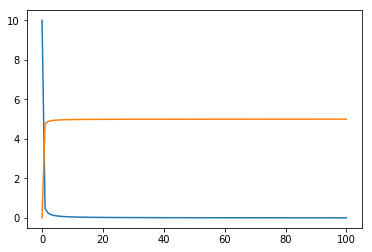

In [8]:
for spec in results[0]:
    if spec == 'time': continue
    plt.plot(results[0]['time'], results[0][spec])